In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [5]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [8]:
test.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# By Using Datetime module
com=[df,test]
for i in com:
    i['date']=pd.to_datetime(i['date']) 
    i['year']=i['date'].dt.year
    i['month']=i['date'].dt.month
    i['day_of_month']=i['date'].dt.day 
    i['day_of_week']=i['date'].dt.dayofweek 
    i['day_of_year']=i['date'].dt.dayofyear
    i['week_of_year']=i['date'].dt.weekofyear
df.head()

,date,store,item,sales,year,month,day_of_month,day_of_week,day_of_year,week_of_year
0,2013-01-01,1,1,13,2013,1,1,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2,2,1
2,2013-01-03,1,1,14,2013,1,3,3,3,1
3,2013-01-04,1,1,13,2013,1,4,4,4,1
4,2013-01-05,1,1,10,2013,1,5,5,5,1


(array([3.00000e+01, 7.70000e+03, 9.31540e+04, 2.22292e+05, 2.51215e+05,
        2.03534e+05, 1.02077e+05, 2.94150e+04, 3.51100e+03, 7.20000e+01]),
 array([ 0.        ,  1.51986842,  3.03973683,  4.55960525,  6.07947366,
         7.59934208,  9.11921049, 10.63907891, 12.15894732, 13.67881574,
        15.19868415]),
 <BarContainer object of 10 artists>)

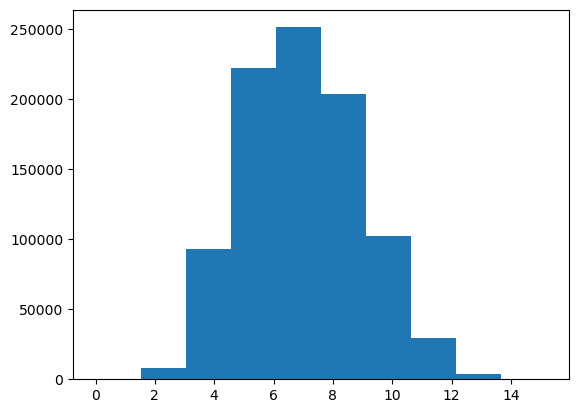

In [12]:
plt.hist(np.sqrt(df['sales']))

<Axes: xlabel='sales', ylabel='count'>

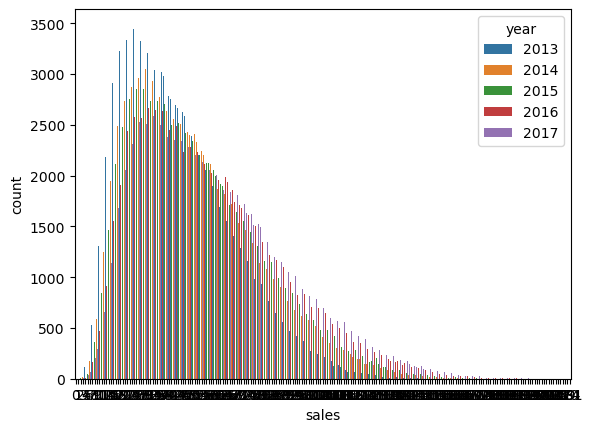

In [13]:
sns.countplot(x='sales',hue='year',data=df)

[Text(0.5, 0, 'day_of_year'),
 Text(0, 0.5, 'sales'),
 Text(0.5, 1.0, 'sales of dayofyear')]

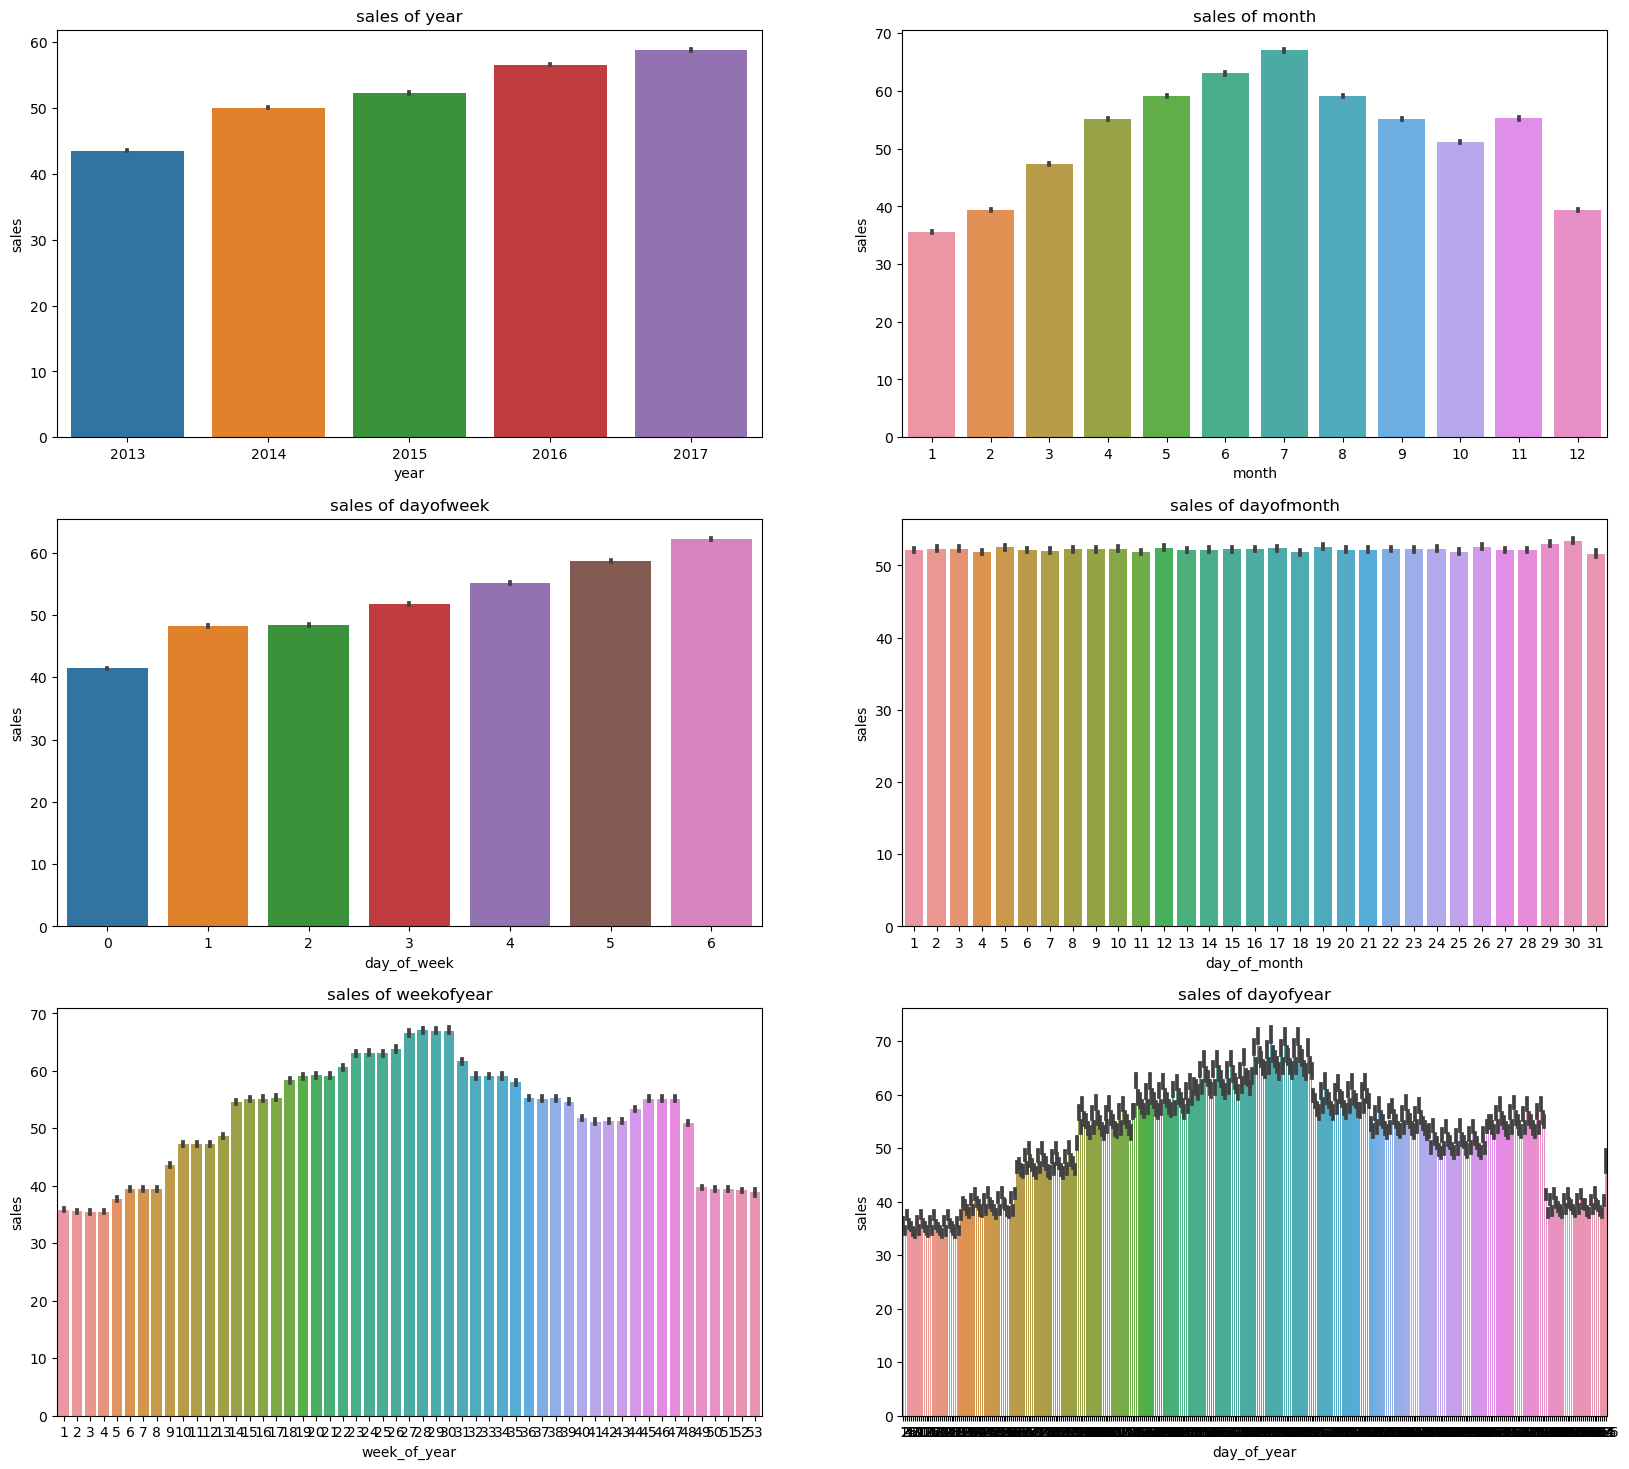

In [14]:
fig,ax=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,18)

sns.barplot(data=df,x='year',y='sales',ax=ax[0,0])
sns.barplot(data=df,x='month',y='sales',ax=ax[0,1])
sns.barplot(data=df,x='day_of_week',y='sales',ax=ax[1,0])
sns.barplot(data=df,x='day_of_month',y='sales',ax=ax[1,1])
sns.barplot(data=df,x='week_of_year',y='sales',ax=ax[2,0])
sns.barplot(data=df,x='day_of_year',y='sales',ax=ax[2,1])

ax[0,0].set(xlabel='year',ylabel='sales',title='sales of year')
ax[0,1].set(xlabel='month',ylabel='sales',title='sales of month')
ax[1,0].set(xlabel='day_of_week',ylabel='sales',title='sales of dayofweek')
ax[1,1].set(xlabel='day_of_month',ylabel='sales',title='sales of dayofmonth')
ax[2,0].set(xlabel='week_of_year',ylabel='sales',title='sales of weekofyear')
ax[2,1].set(xlabel='day_of_year',ylabel='sales',title='sales of dayofyear')

In [15]:
for train in [df]:
    train.loc[(train['week_of_year']<=9) | (train['week_of_year']>=49),'season'] = 1  # wintet
    train.loc[(train['week_of_year']>9) & (train['week_of_year']<=22),'season'] = 2   # spring
    train.loc[(train['week_of_year']>22) & (train['week_of_year']<=35),'season'] = 3  # summer
    train.loc[(train['week_of_year']>35) & (train['week_of_year']<=48),'season'] = 4  # fall

    train.loc[train['day_of_week']<=4,'weekday'] = 1  # weekday
    train.loc[train['day_of_week']>4,'weekday'] = 0   # weekend
df.head()

,date,store,item,sales,year,month,day_of_month,day_of_week,day_of_year,week_of_year,season,weekday
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1.0,1.0
1,2013-01-02,1,1,11,2013,1,2,2,2,1,1.0,1.0
2,2013-01-03,1,1,14,2013,1,3,3,3,1,1.0,1.0
3,2013-01-04,1,1,13,2013,1,4,4,4,1,1.0,1.0
4,2013-01-05,1,1,10,2013,1,5,5,5,1,1.0,0.0


In [16]:
df.head()

,date,store,item,sales,year,month,day_of_month,day_of_week,day_of_year,week_of_year,season,weekday
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1.0,1.0
1,2013-01-02,1,1,11,2013,1,2,2,2,1,1.0,1.0
2,2013-01-03,1,1,14,2013,1,3,3,3,1,1.0,1.0
3,2013-01-04,1,1,13,2013,1,4,4,4,1,1.0,1.0
4,2013-01-05,1,1,10,2013,1,5,5,5,1,1.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          913000 non-null  datetime64[ns]
 1   store         913000 non-null  int64         
 2   item          913000 non-null  int64         
 3   sales         913000 non-null  int64         
 4   year          913000 non-null  int64         
 5   month         913000 non-null  int64         
 6   day_of_month  913000 non-null  int64         
 7   day_of_week   913000 non-null  int64         
 8   day_of_year   913000 non-null  int64         
 9   week_of_year  913000 non-null  int64         
 10  season        913000 non-null  float64       
 11  weekday       913000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 83.6 MB


In [18]:
df['weekday'] = df['weekday'].astype(int)
df['season'] = df['season'].astype(int)

In [19]:
df.drop(columns=['date'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   store         913000 non-null  int64
 1   item          913000 non-null  int64
 2   sales         913000 non-null  int64
 3   year          913000 non-null  int64
 4   month         913000 non-null  int64
 5   day_of_month  913000 non-null  int64
 6   day_of_week   913000 non-null  int64
 7   day_of_year   913000 non-null  int64
 8   week_of_year  913000 non-null  int64
 9   season        913000 non-null  int32
 10  weekday       913000 non-null  int32
dtypes: int32(2), int64(9)
memory usage: 69.7 MB


In [21]:
df.columns

Index(['store', 'item', 'sales', 'year', 'month', 'day_of_month',
       'day_of_week', 'day_of_year', 'week_of_year', 'season', 'weekday'],
      dtype='object')

In [22]:
df.shape

(913000, 11)

In [23]:
x = df.iloc[:,[0,1,3,4,5,6,7,8,9,10]].values
y = df.iloc[:,2].values

In [24]:
# Train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=0)

In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([-7.55436795e-02, -1.11922660e-01,  4.18109752e+00,  1.67345994e+02,
        5.49362600e+00,  3.10943157e+00, -5.49173900e+00, -1.35244109e-01,
        5.77087333e+00, -4.64082837e-01])

In [28]:
lr_pred = lr.predict(x_test)
lr_pred

array([72.03765385, 47.89467599, 52.24884359, ..., 58.87126212,
       30.40241028, 52.75099903])

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 21.3381808993996
MSE: 701.9335840734785
RMSE: 26.49402921553229


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [26.56057201 26.61243798 26.44241348 26.59022269 26.61705999 26.55651265
 26.43850907 26.47148537 26.59809238 26.52184412]
Mean: 26.540914972528395
Standard deviation: 0.06528206209209592


# Decision Tree

In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [34]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
dt_pred = dt.predict(x_test)

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

MAE: 8.380210295728368
MSE: 119.34326834611171
RMSE: 10.924434463445314


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [38]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [10.94568955 10.88324576 10.92895174 10.93504337 10.98174395 10.86939089
 10.94913261 10.93721736 10.91611348 10.8755387 ]
Mean: 10.922206741262531
Standard deviation: 0.03432087258408811


# Random Forest

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [40]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
rf_pred = rf.predict(x_test)
rf_pred

array([70.24, 54.54, 39.34, ..., 47.37, 45.27, 26.74])

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 6.294275443592552
MSE: 67.28972188083243
RMSE: 8.203031261724682


# Test Data

In [43]:
test.head()

,id,date,store,item,year,month,day_of_month,day_of_week,day_of_year,week_of_year
0,0,2018-01-01,1,1,2018,1,1,0,1,1
1,1,2018-01-02,1,1,2018,1,2,1,2,1
2,2,2018-01-03,1,1,2018,1,3,2,3,1
3,3,2018-01-04,1,1,2018,1,4,3,4,1
4,4,2018-01-05,1,1,2018,1,5,4,5,1


In [44]:
test.drop(columns=['date'],axis=1,inplace=True)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            45000 non-null  int64
 1   store         45000 non-null  int64
 2   item          45000 non-null  int64
 3   year          45000 non-null  int64
 4   month         45000 non-null  int64
 5   day_of_month  45000 non-null  int64
 6   day_of_week   45000 non-null  int64
 7   day_of_year   45000 non-null  int64
 8   week_of_year  45000 non-null  int64
dtypes: int64(9)
memory usage: 3.1 MB


In [46]:
predictions = rf_pred.tolist()
predictions

[70.24,
 54.54,
 39.34,
 81.48,
 39.16,
 51.36,
 29.24,
 21.16,
 79.35,
 88.16,
 23.06,
 68.5,
 48.53,
 32.36,
 58.03,
 103.34,
 77.41,
 19.98,
 25.74,
 81.7,
 43.39,
 94.93,
 76.63,
 81.7,
 24.78,
 50.56,
 51.34,
 61.57,
 23.83,
 65.31,
 16.14,
 99.61,
 43.21,
 32.51,
 37.21,
 61.47,
 53.96,
 61.71,
 26.1,
 29.49,
 44.1,
 28.42,
 55.8,
 38.33,
 61.58,
 31.71,
 78.28,
 30.5,
 78.11,
 33.92,
 38.2,
 35.46,
 31.16,
 15.25,
 86.77,
 29.99,
 70.23,
 56.88,
 43.35,
 27.51,
 43.15,
 23.98,
 65.32,
 67.18,
 88.33,
 19.6,
 23.73,
 29.43,
 61.01,
 39.77,
 38.1,
 41.75,
 54.54,
 52.65,
 54.21,
 52.95,
 31.78,
 32.44,
 86.86,
 24.16,
 59.39,
 70.29,
 38.64,
 33.46,
 12.48,
 42.93,
 30.86,
 45.54,
 40.34,
 87.41,
 52.87,
 43.49,
 111.42,
 31.93,
 39.26,
 85.93,
 65.29,
 25.09,
 86.58,
 75.21,
 22.93,
 41.46,
 22.14,
 28.41,
 37.33,
 22.63,
 18.58,
 53.05,
 46.7,
 21.89,
 60.88,
 33.84,
 45.71,
 44.78,
 125.03,
 28.09,
 102.43,
 70.01,
 22.79,
 75.23,
 48.3,
 101.01,
 113.06,
 19.83,
 70.56,
 64.13

In [57]:
up_pred = np.array(predictions)

In [58]:
up_pred

array([70.24, 54.54, 39.34, ..., 47.37, 45.27, 26.74])